In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
md_data = {'Br-prim-bcd-pfos': [-41.45461134853181, 0.5447128997566161], 'CBr3-prim-bcd-pfos': [-45.966852623459694, 1.4340749011715155], 'CBr3-prim-bcd-sds': [-15.128352082999124, 1.753318073632538], 'CCl2CCl2CCl3-prim-bcd-pfos': [-14.992411979831928, 7.3795797112132355], 'CCl2CCl2CCl3-prim-bcd-sds': [-31.274810237567284, 3.816872547386305], 'CCl2CCl3-prim-bcd-pfos': [-26.742241648934538, 1.4663212251834612], 'CCl2CCl3-prim-bcd-sds': [-11.787962520671972, 4.245401942339701], 'CCl3-2-bcd-pfos': [-55.822837055638786, 0.9070036346751218], 'CCl3-2-bcd-sds': [-27.368315467435572, 1.083643558945962], 'CCl3-prim-bcd-pfos': [-34.95539155262826, 1.2259032573870048], 'CCl3-prim-bcd-sds': [-11.850452063791293, 2.593302963401281], 'CF2CF2CF3-prim-acd-pfos': [-15.58570847599949, 3.0597956528456876], 'CF2CF2CF3-prim-acd-sds': [-52.312218433426814, 2.5850134791869186], 'CF2CF2CF3-prim-bcd-pfos': [-30.93569422014402, 1.243723010025221], 'CF2CF2CF3-prim-bcd-sds': [-21.431015607927847, 2.0721969169595984], 'CF2CF2CF3-prim-gcd-pfos': [-28.201956773337123, 1.1779811702214167], 'CF2CF2CF3-prim-gcd-sds': [-18.552471543602323, 1.3915391572378897], 'CF2CF3-prim-acd-pfos': [-19.867487863795198, 1.126052833052011], 'CF2CF3-prim-acd-sds': [-52.84831191724645, 1.6343145068898508], 'CF2CF3-prim-bcd-pfos': [-50.50850096458517, 1.4034479340274024], 'CF2CF3-prim-bcd-sds': [-23.222430003315345, 1.9056189174607265], 'CF2CF3-prim-gcd-pfos': [-37.88160007397083, 1.0819864925202731], 'CF2CF3-prim-gcd-sds': [-18.763202677254945, 1.2382106907918764], 'CF3-2-gcd-pfos': [-21.964809133582886, 0.3126432796947584], 'CF3-2-gcd-sds': [-12.056846855110935, 0.45720887279711575], 'CF3-prim-acd-pfos': [-30.218695890908986, 0.5993689163632637], 'CF3-prim-bcd-pfos': [-52.8173000280161, 0.9410886443743742], 'CF3-prim-bcd-sds': [-44.80613073998021, 2.15813339085731], 'CF3-prim-gcd-pfos': [-38.256359327424526, 0.6550209900608603], 'CF3-prim-gcd-sds': [-28.071451473578975, 0.9889428823363998], 'CH2CH2CH3-prim-bcd-pfos': [-59.21059026087795, 1.131464411452854], 'CH2CH2CH3-prim-bcd-sds': [-43.03221250784417, 2.0375111816922336], 'CH2CH3-prim-bcd-pfos': [-60.470232973964585, 0.6748615378810772], 'CH2CH3-prim-bcd-sds': [-42.43039887734285, 1.9717356101688719], 'CH2Cl-5-bcd-pfos': [-42.79051792509427, 0.31449183601127156], 'CH2Cl-5-bcd-sds': [-21.56788175450182, 0.5967826142506405], 'CH3-prim-bcd-pfos': [-59.04423693704698, 0.5270479979664684], 'CH3-prim-bcd-sds': [-47.271262884942495, 1.7257141389264479], 'Cl-3-bcd-pfos': [-17.703943093264353, 0.7224641065217305], 'Cl-3-bcd-sds': [-23.336676444089747, 1.2204603551137636], 'Cl-4-bcd-sds': [-32.79508237265837, 0.6965460479036879], 'Cl-both-bcd-pfos': [-38.909696634935955, 0.5727006954369733], 'Cl-both-bcd-sds': [-25.98731058808779, 1.2650751814575476], 'Cl-prim-bcd-pfos': [-48.802186719915746, 0.23280305244293661], 'Cl-prim-bcd-sds': [-33.700077430447074, 1.2613116711230214], 'F-1-acd-pfos': [-17.11377617611998, 0.48699566396880756], 'F-1-acd-sds': [-19.731500457057813, 0.5832040105682633], 'F-both-bcd-pfos': [-39.29819087698171, 0.4846381137937752], 'F-both-bcd-sds': [-28.933723466309505, 0.7475321779921578], 'F-prim-acd-pfos': [-22.87221383287175, 0.5877230976091528], 'F-prim-acd-sds': [-37.90695987034289, 1.3286227588865112], 'F-prim-bcd-pfos': [-46.082010420860094, 0.41163623113524], 'F-prim-bcd-sds': [-26.32274238222098, 0.39099535435985355], 'F-prim-gcd-pfos': [-33.888514438752544, 0.5709893158011082], 'F-prim-gcd-sds': [-12.412959069098658, 0.5372560132829004], 'NH2-prim-bcd-pfos': [-42.62977537848384, 0.33737922389943803], 'NH2-prim-bcd-sds': [-15.132988756770283, 0.48172632090591855], 'acd-pfos': [-11.072944972508003, 0.7664515936705897], 'acd-sds': [-25.259036759443788, 0.6173075897105246], 'acd-tcaa': [-2.4050613178083062, 1.1739854509377243], 'bcd-pfos': [-38.18616568500844, 0.21386871759424908], 'bcd-sds': [-28.649418555954025, 0.3783654818658343], 'bcd-tcaa': [-10.9182516954934, 0.2649818844477931], 'cucurbit7uril-pfos': [-10.383179954844854, 3.017493577628128]}

In [3]:
# Vina CSV output paths

# Base directory for vina data
vina_data = Path("/Users/srusti/FergLab/data/md_bcd_mods_relaxed/vina_outputs/")

# Vina data for structures that we also have MD modifications for 
Br_prim_bcd_pfos = pd.read_csv(vina_data / "Br-prim-bcd-pfos_affinities.csv")
CBr3_prim_bcd_pfos = pd.read_csv(vina_data / "CBr3-prim-bcd-pfos_affinities.csv")
CF3_prim_bcd_pfos = pd.read_csv(vina_data / "CF3-prim-bcd-pfos_affinities.csv")
Cl_prim_bcd_pfos = pd.read_csv(vina_data / "Cl-prim-bcd-pfos_affinities.csv")
CH3_prim_bcd_pfos = pd.read_csv(vina_data / "CH3-prim-bcd-pfos_affinities.csv")
F_both_bcd_pfos = pd.read_csv(vina_data / "F-both-bcd-pfos_affinities.csv")
CCl3_prim_bcd_pfos = pd.read_csv(vina_data / "CCl3-prim-bcd-pfos_affinities.csv")
Cl_both_bcd_pfos = pd.read_csv(vina_data / "Cl-both-bcd-pfos_affinities.csv")
NH2_prim_bcd_pfos = pd.read_csv(vina_data / "NH2-prim-bcd-pfos_affinities.csv")
bcd_pfos = pd.read_csv(vina_data / "bcd-pfos_affinities.csv")

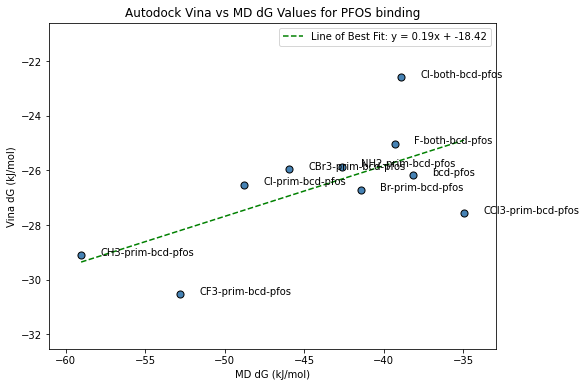

In [4]:
md_vals = []
vina_vals = []
labels = [] # names of receptors

file_to_md_key = {
    "Br-prim-bcd-pfos_affinities.csv": "Br-prim-bcd-pfos",
    "CBr3-prim-bcd-pfos_affinities.csv": "CBr3-prim-bcd-pfos",
    "CCl3-prim-bcd-pfos_affinities.csv": "CCl3-prim-bcd-pfos",
    "Cl-prim-bcd-pfos_affinities.csv": "Cl-prim-bcd-pfos",
    "CH3-prim-bcd-pfos_affinities.csv": "CH3-prim-bcd-pfos",
    "CF3-prim-bcd-pfos_affinities.csv": "CF3-prim-bcd-pfos",
    "F-both-bcd-pfos_affinities.csv": "F-both-bcd-pfos",
    "Cl-both-bcd-pfos_affinities.csv": "Cl-both-bcd-pfos",
    "NH2-prim-bcd-pfos_affinities.csv": "NH2-prim-bcd-pfos",
    "bcd-pfos_affinities.csv": "bcd-pfos",
}


for fname, md_key in file_to_md_key.items():
    csv_path = vina_data / fname
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        vina_dg = df.iloc[0, 0]  # Top Vina dG
        md_dg = md_data[md_key][0]  # MD dG value
        vina_vals.append(vina_dg)
        md_vals.append(md_dg)
        labels.append(md_key)
    else:
        print(f"File not found: {csv_path}")

# Convert Vina to kj/mol
vina_vals = np.array(vina_vals)
vina_vals = vina_vals * 4.184
        
x_min, x_max = min(md_vals), max(md_vals)
y_min, y_max = min(vina_vals), max(vina_vals)


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(md_vals, vina_vals, color='steelblue', edgecolor='black', s=50)

# for x, y, label in zip(md_vals, vina_vals, labels):
#     plt.text(x + 0.5, y, label, fontsize=12)

# Adjust label position to avoid overlap and ensure they're visible
for x, y, label in zip(md_vals, vina_vals, labels):
    # Adjusts label position to avoid overlap
    label_offset = 0.05 * (x_max - x_min)  
    plt.text(x + label_offset, y, label, fontsize=10)

# # Parity line

# parity_min = min(x_min, y_min) - 2
# parity_max = max(x_max, y_max) + 2
# plt.plot([parity_min, parity_max], [parity_min, parity_max], 'r--', label='Parity Line')


plt.xlim(x_min - 2, x_max + 2)
plt.ylim(y_min - 2, y_max + 2)


# Linear regression line
slope, intercept = np.polyfit(md_vals, vina_vals, 1) # slope between md and vina
x_vals = np.linspace(min(md_vals), max(md_vals), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, 'g--', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')


plt.xlabel("MD dG (kJ/mol)")
plt.ylabel("Vina dG (kJ/mol)")
plt.title("Autodock Vina vs MD dG Values for PFOS binding")
plt.legend()
plt.show()

In [5]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(md_vals, vina_vals)
print(f"Pearson correlation coefficient: {r_value:.3f}")
print(f"P-value: {p_value:.3e}")

Pearson correlation coefficient: 0.638
P-value: 4.729e-02


There is a moderate, positive linear relationship between Vina values and MD values for the relaxed geometries.